# Titanic. What factor(s) correlate to survival on the Titanic?
    Prepared By: Hansel Wei 
      for ITCS 4156 Assign 1: Model Selection and Tuning
      
### Big Picture:
- Train Titanic data from (https://www.kaggle.com/c/titanic). 

- In this experiment, we're investigating what factors mostly likely contibute to surviving the Titanic based on passengers. A "what-if" if one was to be on the Titanic present day. 
- Features include their ID, Surival, Passenger Class (1st, 2nd, 3rd floors), Age, Fare, etc. 
- A comprehensive list is shown below:



### Documentation:
| Variable Notes  | 
|-----------------|-----------------------------------------------------------------------|--------------------------------------------------|
|                 | pclass: A proxy for socio-economic status (SES)                       |
|
|                 | 1st = Upper 2nd = Middle 3rd = Lower                                  |                                                |
|                 | sibsp: The dataset defines family relations in this way...            |                                                |
|                 | Sibling = brother, sister, stepbrother, stepsister                    |                                                |
|                 | Spouse = husband, wife (mistresses and fiancés were ignored)          |                                                |
|                 | parch: The dataset defines family relations in this way...            |                                                |
|                 | Parent = mother, father                                               |                                                |
|                 | Child = daughter, son, stepdaughter, stepson                          |                                                |
|                 | Some children traveled only with a nanny, therefore parch=0 for them. |                                                |

| Variable        | Definition                                                            | Key                                            |
|-----------------|-----------------------------------------------------------------------|------------------------------------------------|
| survival        | Survival                                                              | 0 = No, 1 = Yes                                |
| pclass          | Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd                                | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Age             | Age in years                                                          |                                                |
| sibsp           | # of siblings / spouses aboard the Titanic                            |                                                |
| parch           | # of parents / children aboard the Titanic                            |                                                |
| ticket          | Ticket number                                                         |                                                |
| fare            | Passenger fare                                                        |                                                |
| cabin           | Cabin number                                                          |                                                |
| embarked        | Port of Embarkation                                                   | C = Cherbourg, Q = Queenstown, S = Southampton |
|                 |                                                                       | 

# Exploring Data
Summary:
- The Data Size: train.csv is 0.05976 MB (59.76 KB)
- Has 891 Entries (will be dropping NaNs)
- Starting with 12 features, however some of them were catagorical after cleaning / prepping the data with pd.get_dummies there are 270 Features (Columns) among the combinations and combining features while dropping Ticket#, Passenger, Name, and PassengerID to create better features, ended back with 12 features that had good insights

In [947]:
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import os

# data stored in datasets/ folder
passengers = pd.read_csv("datasets/train.csv")
passengers.head

PROJECT_ROOT_DIR = "."
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [948]:
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [949]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [950]:
PASSENGER_PATH = os.path.join("datasets", "train.csv")

def load_passenger_data(passenger_data=PASSENGER_PATH):
    csv_path = PASSENGER_PATH
    return pd.read_csv(csv_path)

In [951]:
passengers = load_passenger_data()
print(len(passengers.columns))
passengers.head()

12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- prelim insights:

In [952]:
print(passengers["Survived"].value_counts())
print("Mean: ",passengers["Survived"].mean())
passengers.groupby("Pclass").mean()

0    549
1    342
Name: Survived, dtype: int64
Mean:  0.3838383838383838


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


> Cool insights is that passengers in class 1 had a 67% survival rate vs 80% in class 2 and 50% in class 2

<function matplotlib.pyplot.show>

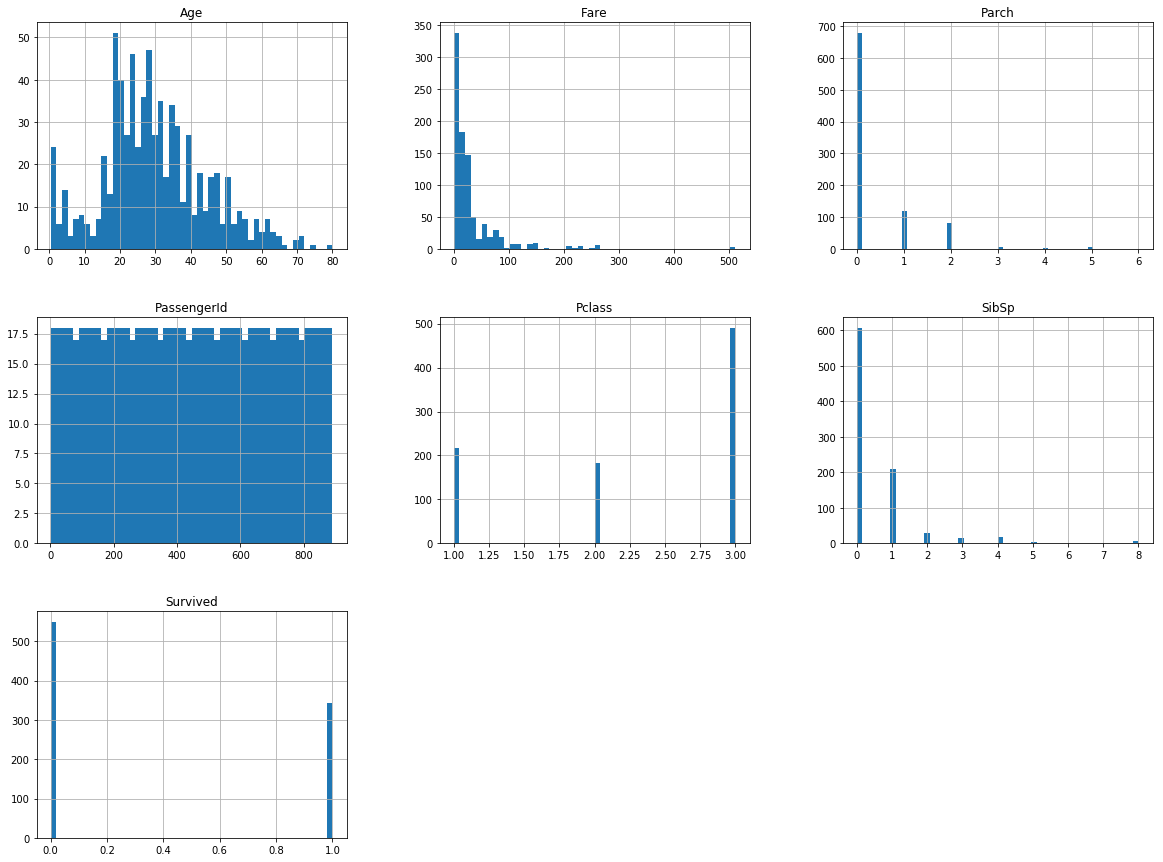

In [953]:
# prelim looking at data

%matplotlib inline
import matplotlib.pyplot as plt
passengers.hist(bins=50, figsize=(20,15))
plt.show

# Prep & Cleaning Data 
- Exploring dropping data (non-essential)
- Decided that Name and PassengerID wasn't essential because anomonous data would work better if 


In [954]:
passengers = passengers.drop("Name", axis=1)
passengers = passengers.drop("PassengerId", axis=1)

passengers = passengers.drop("Cabin", axis=1)
passengers = passengers.drop("Ticket", axis=1)
# passengers = passengers.drop("Sex", axis=1)
# passengers = passengers.drop("Embarked", axis=1)

passengers = passengers.drop("Fare", axis=1)
# passengers = passengers.drop("Parch", axis=1)
# passengers = passengers.drop("Pclass", axis=1)
# passengers = passengers.drop("SibSp", axis=1)


# drop NaN

passengers = passengers.dropna()

passengers.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C
10,1,3,female,4.0,1,1,S


#### Translating Catagorical Data into numerical data using built-in pandas.get_dummies


In [955]:
passengers = pd.get_dummies(passengers)

## Insights
-

In [956]:
passengers.describe()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,0.363764,0.636236,0.182584,0.039326,0.778090
std,0.491139,0.836854,14.492933,0.930692,0.854181,0.481420,0.481420,0.386597,0.194506,0.415823
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3a. Discover (Finding Coorelations)
- using pandas.DataFrame.corr
- found not many coorelations
- start by grouping relavant data (finding new features)

In [957]:
passengers.corr(method='pearson', min_periods=1)

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.536762,-0.536762,0.195673,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.150826,0.150826,-0.279194,0.131989,0.197831
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,-0.099037,0.099037,0.038268,-0.021693,-0.025431
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.106296,-0.106296,-0.046227,0.051331,0.018968
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.249543,-0.249543,-0.009523,-0.009417,0.013259
Sex_female,0.536762,-0.150826,-0.099037,0.106296,0.249543,1.000000,-1.000000,0.103611,0.027256,-0.109078
Sex_male,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-1.000000,1.000000,-0.103611,-0.027256,0.109078
Embarked_C,0.195673,-0.279194,0.038268,-0.046227,-0.009523,0.103611,-0.103611,1.000000,-0.095623,-0.884986
Embarked_Q,-0.048966,0.131989,-0.021693,0.051331,-0.009417,0.027256,-0.027256,-0.095623,1.000000,-0.378859
Embarked_S,-0.159015,0.197831,-0.025431,0.018968,0.013259,-0.109078,0.109078,-0.884986,-0.378859,1.000000


# Diving Deeper. Grouping Features for better insights
- Finding new custom features

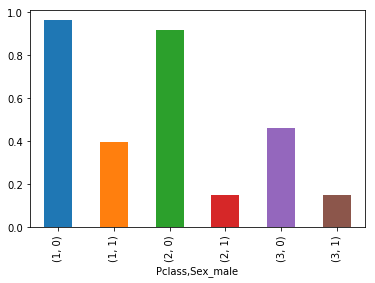

In [958]:
import numpy as np

# Male
class_male_sex_grouping = passengers.groupby(["Pclass", "Sex_male"]).mean()
class_male_sex_grouping['Survived'].plot.bar()

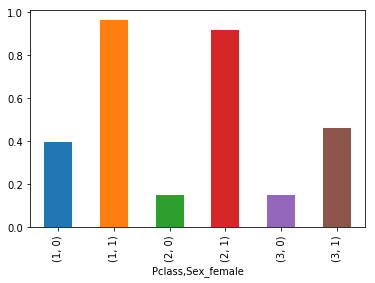

In [959]:
# female
class_female_sex_grouping = passengers.groupby(["Pclass", "Sex_female"]).mean()
class_female_sex_grouping['Survived'].plot.bar()

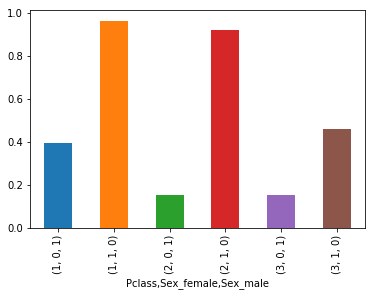

In [960]:
# both
class_sex_grouping = passengers.groupby(["Pclass", "Sex_female", "Sex_male"]).mean()
class_sex_grouping['Survived'].plot.bar()

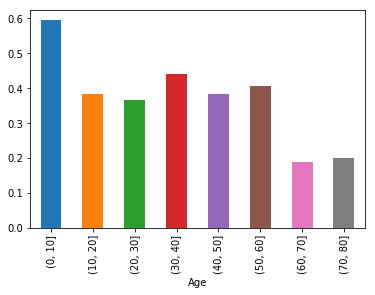

In [961]:
# group by age
group_by_age = pd.cut(passengers["Age"], np.arange(0, 90, 10))
age_grouping = passengers.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [962]:
passengers.count()

Survived      712
Pclass        712
Age           712
SibSp         712
Parch         712
Sex_female    712
Sex_male      712
Embarked_C    712
Embarked_Q    712
Embarked_S    712
dtype: int64

In [963]:
corr_matrix = passengers.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived      1.000000
Sex_female    0.536762
Embarked_C    0.195673
Parch         0.095265
SibSp        -0.015523
Embarked_Q   -0.048966
Age          -0.082446
Embarked_S   -0.159015
Pclass       -0.356462
Sex_male     -0.536762
Name: Survived, dtype: float64

# Split Data

In [964]:
import numpy as np
from sklearn.cross_validation import train_test_split

# train_set, test_set = train_test_split(passengers, test_size=0.3, random_state=42)

np.random.seed(42)

#train_set, test_set = train_test_split(passengers, test_size=0.3, random_state=42)

X, y = passengers, passengers["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
passengers.describe
# passengers = train_set.drop("Survived", axis=1)
X_test.head()
print((len(X_train), len(y_train)), "train +", (len(X_test), len(y_test)), "test")

(477, 477) train + (235, 235) test


In [965]:
X_test.head(), y_test.head()

(     Survived  Pclass   Age  SibSp  Parch  Sex_female  Sex_male  Embarked_C  \
 641         1       1  24.0      0      0           1         0           1   
 496         1       1  54.0      1      0           1         0           1   
 262         0       1  52.0      1      1           0         1           0   
 311         1       1  18.0      2      2           1         0           1   
 551         0       2  27.0      0      0           0         1           0   
 
      Embarked_Q  Embarked_S  
 641           0           0  
 496           0           0  
 262           0           1  
 311           0           0  
 551           0           1  , 641    1
 496    1
 262    0
 311    1
 551    0
 Name: Survived, dtype: int64)

In [966]:
from sklearn.metrics import roc_curve, auc

In [967]:
from sklearn.linear_model import SGDClassifier

# commented out to change between regularization penalties
sgd_clf = SGDClassifier(max_iter=5, penalty='l1', random_state=42) 
# sgd_clf = SGDClassifier(max_iter=5, penalty='l2', random_state=42) 
# sgd_clf = SGDClassifier(max_iter=5, penalty='elasticnet', random_state=42) 
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [968]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [969]:
sgd_clf.predict(passengers)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [970]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.89937107, 0.96855346, 0.94339623])

model reaches over 80% accuracy.

In [971]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3, random_state=42)

# for train_index, test_index in skfolds.split(X_train, y_train):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = (y_train[train_index])
#     X_test_fold = X_train[test_index]
#     y_test_fold = (y_train[test_index])

#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

In [972]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [973]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[287,   1],
       [ 29, 160]])

In [974]:
y_train_perfect_predictions = y_train

In [975]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.9937888198757764

In [976]:
recall_score(y_train, y_train_pred)

0.8465608465608465

In [977]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.9142857142857141

In [978]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
y_scores

array([-3367.9934265 , -3406.49482342, -2368.88319726,  1433.45521034,
       -3214.35125215, -1124.92484026, -1200.40785363, -1987.20602659,
       -2830.06410962, -3637.06710894, -1430.98013914, -1564.45382847,
       -2753.20668112, -1362.93180124, -2795.31639177,  1327.12934251,
         511.25694788, -2637.88419703,  2163.60078115,  1823.05797273,
         635.44882728,    97.44682774,  1211.84319975, -3022.20768089,
         263.18892667, -2294.63574061, -1121.79511084, -3752.3532517 ,
       -2975.32369712, -1603.95356726, -2949.03124878,  -334.21110702,
         136.89542049,  -169.01688283,   664.93546356, -2753.20668112,
         853.43437976, -2830.06410962,   853.43437976,   330.59274379,
         370.12882391,  -132.10557928, -3060.63639514, -3483.27956926,
       -2407.31191151, -2753.13399845, -1487.6327413 ,  -855.96428963,
       -3022.20768089,  -432.17330051,   644.22157655, -2368.88319726,
       -2486.61101485, -2641.60153475, -3214.35125215, -2676.34925261,
      

In [979]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

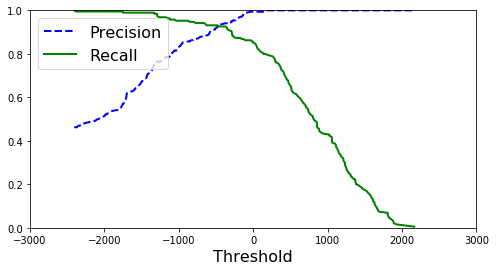

In [980]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-3000, 3000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [981]:
(y_train_pred == (y_scores > 0)).all()

True

In [982]:
y_train_pred_90 = (y_scores > 1000)

In [983]:
from sklearn.metrics import precision_score, recall_score

In [984]:
precision_score(y_train, y_train_pred_90)

1.0

In [985]:
recall_score(y_train, y_train_pred_90)

0.42857142857142855

# ROC curves

In [986]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

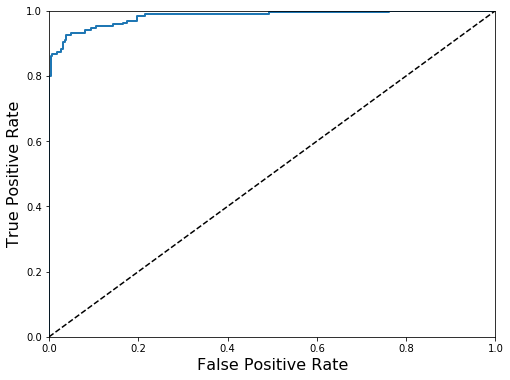

In [987]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

In [988]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9822898295120517

Roc Curve score > 97.8% which is really good. It might be overfitting.

## Let's try a RandomForestClassifier:

In [989]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=10,
                                    method="predict_proba")
scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
scores.mean()

1.0

Our RandomForestClassifier has a score of 1.0, which is perfect. hmm...
Either this is perfect or too good to be true

In [990]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

Let's plot it!

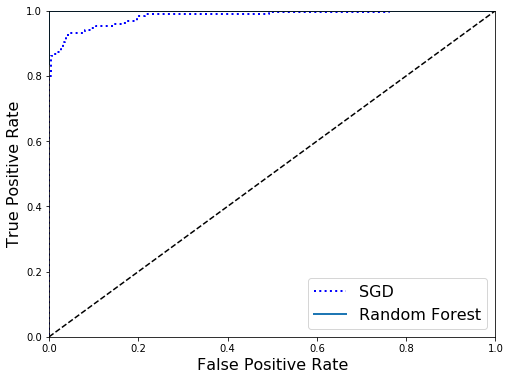

In [991]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

## Trying the GaussianNB Model (compare to last assignment's "better model")
- Found binary classification metrics quickly

In [992]:
passengers = load_passenger_data()
passengers.head()

passengers = passengers.drop("Name", axis=1)
passengers = passengers.drop("Cabin", axis=1)
passengers = passengers.drop("Sex", axis=1)
passengers = passengers.drop("Embarked", axis=1)
passengers = passengers.drop("Ticket", axis=1)
passengers = passengers.drop("Fare", axis=1)
passengers = passengers.drop("Parch", axis=1)
passengers = passengers.drop("PassengerId", axis=1)
passengers = passengers.drop("Pclass", axis=1)
passengers = passengers.drop("SibSp", axis=1)

# drop NaN
passengers = passengers.dropna()

passengers.head(20)

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0
10,1,4.0


In [993]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

train_set, test_set = train_test_split(passengers, test_size=0.33, random_state=42)


passengers.describe
passengers = train_set.drop("Survived", axis=1)
test_set.head()

,Survived,Age
149,0,42.0
407,1,3.0
53,1,29.0
369,1,24.0
818,0,43.0


In [994]:
passenger_labels = train_set["Survived"].copy()
print(passenger_labels)

271    1
853    1
696    0
518    1
609    1
102    0
27     0
16     0
562    0
733    0
419    0
362    0
889    1
412    1
543    1
322    1
171    0
532    0
401    0
43     1
396    0
441    0
10     1
312    0
25     1
275    1
807    0
873    0
439    0
749    0
      ..
24     0
391    1
580    1
202    0
343    0
237    1
483    1
519    0
622    1
429    1
385    0
827    1
162    0
830    1
125    1
465    0
112    0
579    1
408    0
266    0
588    0
150    0
770    0
23     1
875    1
92     0
134    0
337    1
548    0
130    0
Name: Survived, Length: 478, dtype: int64


In [995]:
from sklearn import preprocessing

rescale = preprocessing.scale(passengers)

In [996]:
# Building a binary classifier

from sklearn.naive_bayes import GaussianNB

# init
gnb = GaussianNB()

gnb

# train
model = gnb.fit(rescale, passenger_labels)

In [997]:
# Make predictions
preds = gnb.predict(train_set) # accuracy based on training set

print(preds)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [998]:
from sklearn.metrics import accuracy_score

# Accuracy Score
print("Gaussian Naive Bayes model accuracy(in %):","\n",accuracy_score(passenger_labels, preds) * 100,"%")

Gaussian Naive Bayes model accuracy(in %): 
 37.238493723849366 %


## Confusion Matrix / Metrics Score
- hmm..seems too good to be true. like overfitting maybe?

In [999]:
from sklearn import metrics
# make predictions
expected = preds
predicted = model.predict(passengers)

# print(expected)
# print(predicted)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98        33
          1       1.00      1.00      1.00       445

avg / total       1.00      1.00      1.00       478

[[ 32   1]
 [  0 445]]


GaussianNB only has 1 FN. Seems too good to be true still.

In [1000]:
scores.mean()

1.0

# Summary / Future / TODO
- Need more data to look into it.
- Data seems to be overfitting.
- Find and make better features.
- SGD was the best model to pick (was normalized w)
- I think I need to improve on better predictions with multiple predictions.
- Used GaussianNB (assumed normal distribution) to see more insights, but turned out to be horrible.
## Stats
- ##### Using L1 (Logistic)
 - precision score: 1.0
 - recall score: 0.42857142857142855
 - f1 score: 0.9142857142857141
 - Roc Curve score > 98.2% which is really good. It might be overfitting.
 
- ##### Using L2 (Ridge Regression)
 - precision score: 1.0
 - recall score:  0.3968253968253968
 - f1 score: 0.5681818181818182
 - Roc Curve score > 98.22898295120517% which is really good. Interestingly good with a more balance precision and recall
 
- ##### Using Elastic Net
 - precision score: 0.993006993006993
 - recall score: 0.7513227513227513
 - f1_score: 0.8554216867469879
 - When doing cross calidation on SGD model reaches over 80% accuracy.
 - Roc Curve score > 97.8% which is really good. It might be overfitting.

## Conclusion
- Decided to use Elastic Net SGD, because the precision isn't perfect and it has a variably high recall which is essential. However, L2 Ridge regression when normalizing would create the best model because of low recall, high precision in predicting survival. Would need more data (maybe use the full test and train sets) to further investigate the overfitting. Lastly, may try to find more features to combine / make.